In this notebook I want to use __Titanic Dataset__ to explore the datasets and implementing basic machine learning models. I am following the kaggel notebook for learning purpose. The dataset downloaded from the kaggel website.

__link__: __[Kaggel Titanic](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook#EDA-To-Prediction-(DieTanic))__

This notebook contains __3 Parts__ :

#### Part1: Exploratory Data Analysis __(EDA)__
#### Part2: Feature Engineering and Data Cleaning
#### Part3: Predictive Modeling


### Part1: Exploratory Data Analysis (__EDA__)

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [145]:
data = pd.read_csv('../Titanic Project/dataset/train.csv')

In [146]:
data.head() #first 5 data of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
#the describe() method is used for calculating some statistical data of the numerical values of the dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
#checking the total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The __Age, Cabin, Embarked__ have null values

__How Many Survived?__

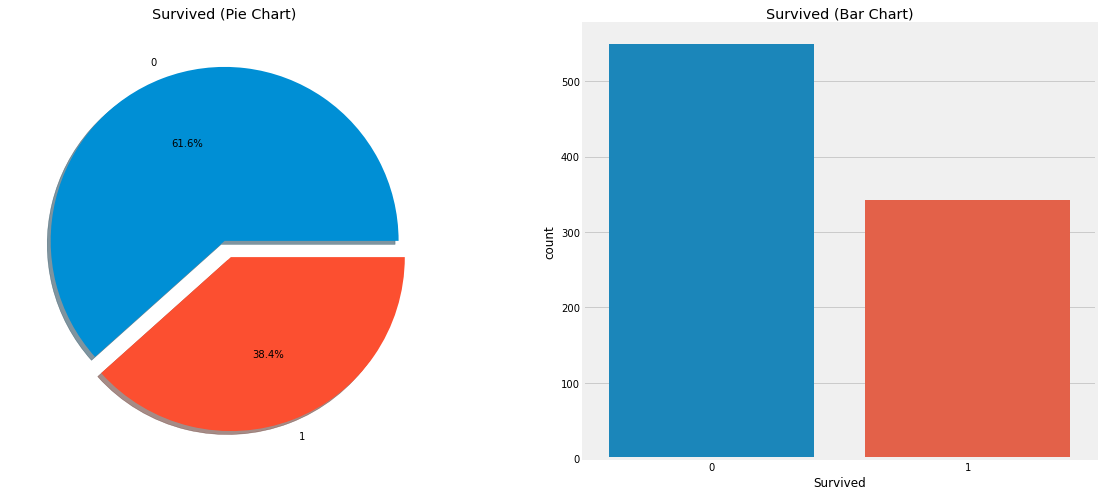

In [149]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax= axs[0],shadow=True)
axs[0].set_title('Survived (Pie Chart)')
axs[0].set_ylabel('')

sns.countplot('Survived',data=data, ax=axs[1])
axs[1].set_title('Survived (Bar Chart)')
plt.show()

It shows that most of the passengers did not survive on that accident

out of __891__ passengers around __350__ passengers survived. Only __38.4%__ of the total training set survived. Now we have to find better insight from the data which categories of passengers did survive and who didn't.

 #### Categorical Features: __Sex,Embarked__
 #### Ordinal Features: __PClass__  (same as categorical features but can sort the values)
 #### Continous Features: __Age__

## Analysis the features

__Sex &#8594; Categorical Features__

In [150]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

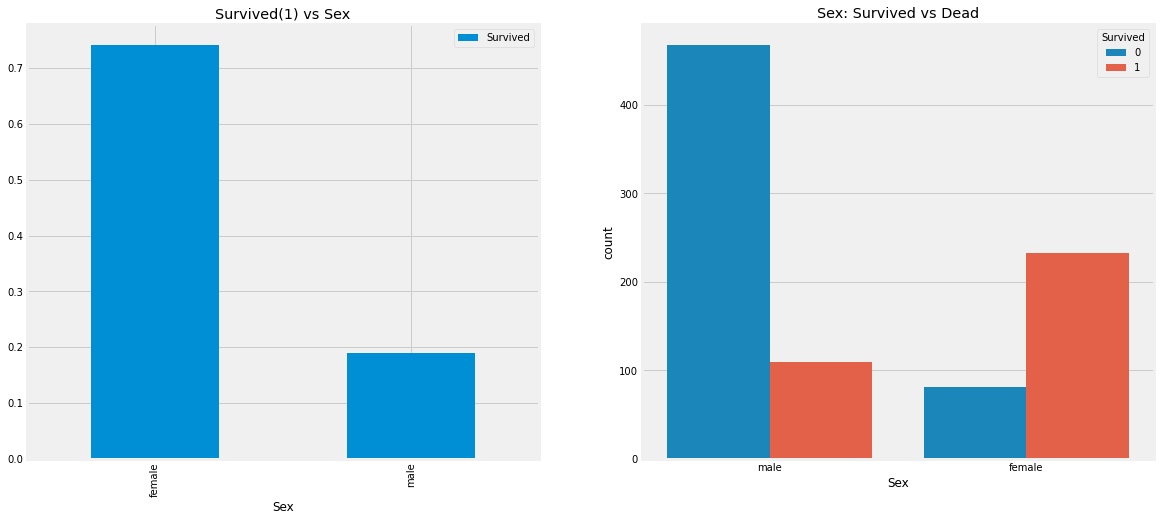

In [151]:
fig2,axs2 = plt.subplots(nrows=1,ncols=2, figsize=(18,8))
data[["Sex",'Survived']].groupby(['Sex']).mean().plot.bar(ax=axs2[0])
axs2[0].set_title('Survived(1) vs Sex')

sns.countplot('Sex',hue='Survived', data=data, ax=axs2[1])
axs2[1].set_title('Sex: Survived vs Dead')
plt.show()

This is interesting. The number of men survived is lower than the female. around __74% Female Survived__ than the __Men__. Survived percentage for the men is around __18-19%__.

__Pclass &#8594; ordinal Features__

In [152]:
pd.crosstab(index=data.Pclass, columns=data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


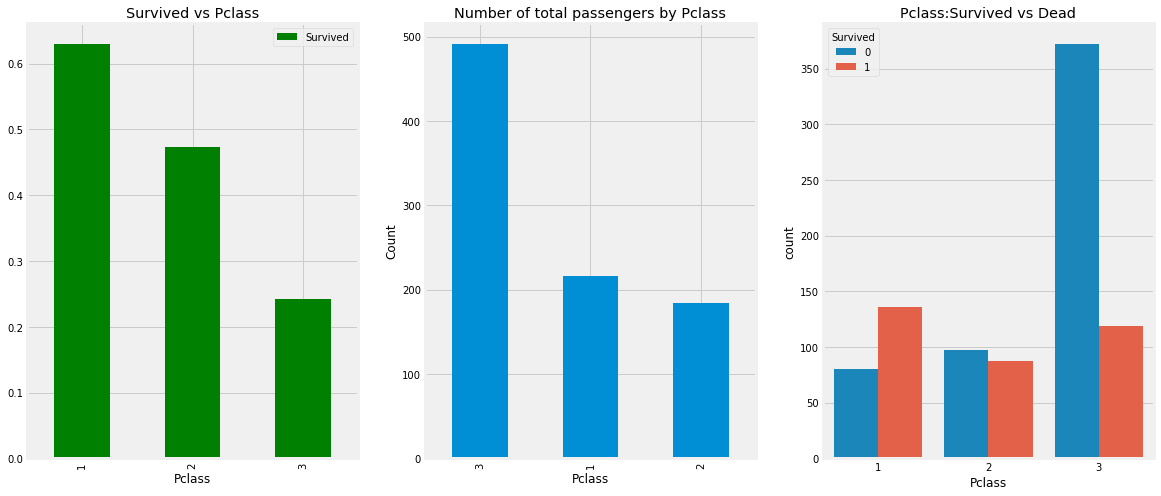

In [153]:
fig3, axs3 = plt.subplots(nrows=1,ncols=3,figsize=(18,8))
data[['Pclass','Survived']].groupby('Pclass').mean().plot.bar(ax=axs3[0],color='green')
axs3[0].set_title('Survived vs Pclass')

data['Pclass'].value_counts().plot.bar(ax=axs3[1])
axs3[1].set_title("Number of total passengers by Pclass")
axs3[1].set_xlabel('Pclass')
axs3[1].set_ylabel('Count')


sns.countplot('Pclass', hue='Survived', data=data, ax=axs3[2])
axs3[2].set_title('Pclass:Survived vs Dead')
plt.show()



Here we see around __63% Pclass=1__ people survived, __48% Pclass=2__ survived and around __25% Pclass=3__ survived though the total number of paseengers of Pclass 3 were more. So it is clearly state that high class people were getting benefited whike rescue 

__Sex and Pclass together__

In [154]:
pd.crosstab(index=[data.Sex,data.Survived], columns=data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

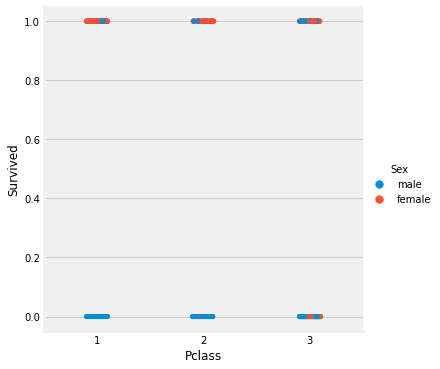

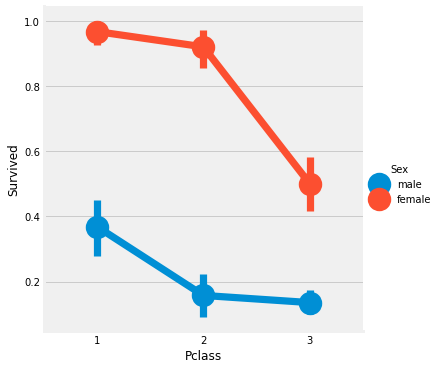

In [155]:
sns.catplot(x='Pclass', y='Survived',data=data, hue='Sex')
sns.factorplot(x='Pclass', y='Survived',data=data, hue='Sex')
plt.show()

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for __Women from Pclass1__ is about __95-96%__, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

__Age &#8594; Continous Feature__

In [156]:
print(f"Oldest passenger in the Titanic : {data['Age'].max()} years")
print(f"Youngest passenger in the Titanic : {data['Age'].min()} years")
print(f"The average age of the passengers in the Titanic : {data['Age'].mean()} years")

Oldest passenger in the Titanic : 80.0 years
Youngest passenger in the Titanic : 0.42 years
The average age of the passengers in the Titanic : 29.69911764705882 years


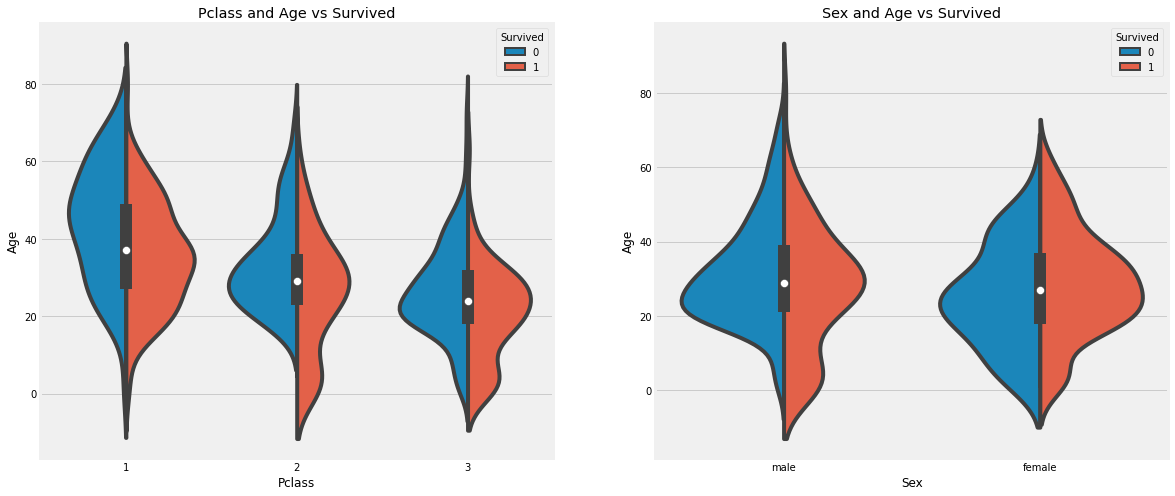

In [157]:
fig4, axs4 = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=axs4[0])
axs4[0].set_title("Pclass and Age vs Survived")
axs[0].set_yticks(range(0,110,10))


sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=axs4[1])
axs4[1].set_title("Sex and Age vs Survived")
axs[1].set_yticks(range(0,110,10))
plt.show()



Observations: \
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

__''What's In A Name??''&#8594; Feature__ :p



In [158]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [159]:
pd.crosstab(index=data.Initial, columns=data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values

In [160]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [161]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [162]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [163]:
data.Age.isnull().any() #checking age is null anymore

False

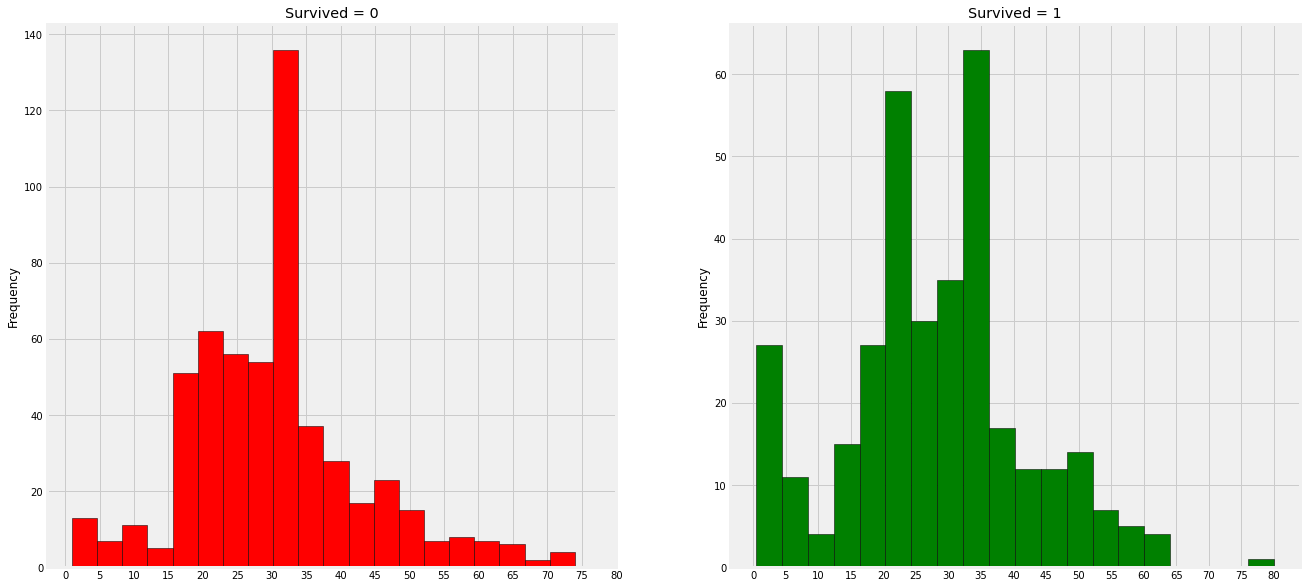

In [164]:
fig5,axs5 = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=axs5[0],bins=20,edgecolor='black',color='red')
axs5[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
axs5[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=axs5[1],bins=20,edgecolor='black',color='green')
axs5[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
axs5[1].set_xticks(x2)

plt.show()

Observations:\
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

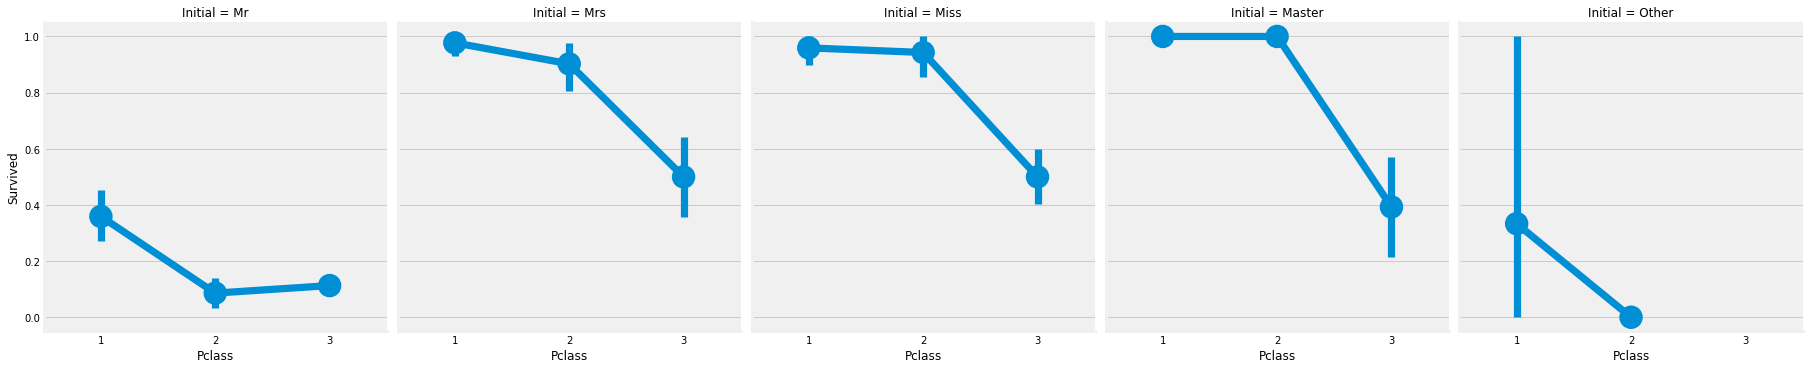

In [165]:
sns.factorplot('Pclass', 'Survived', data=data, col='Initial')
plt.show()

__Embarked &#8594; Categorical Value__

In [166]:
pd.crosstab(index=[data.Embarked,data.Pclass],columns=[data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port Of Embarkation¶

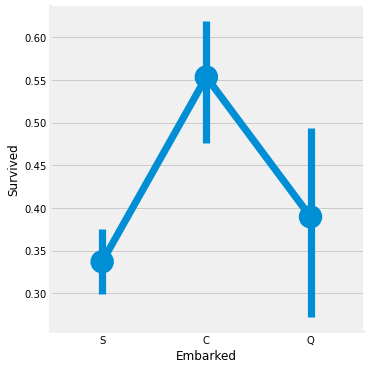

In [167]:
sns.factorplot(x='Embarked', y='Survived', data=data)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

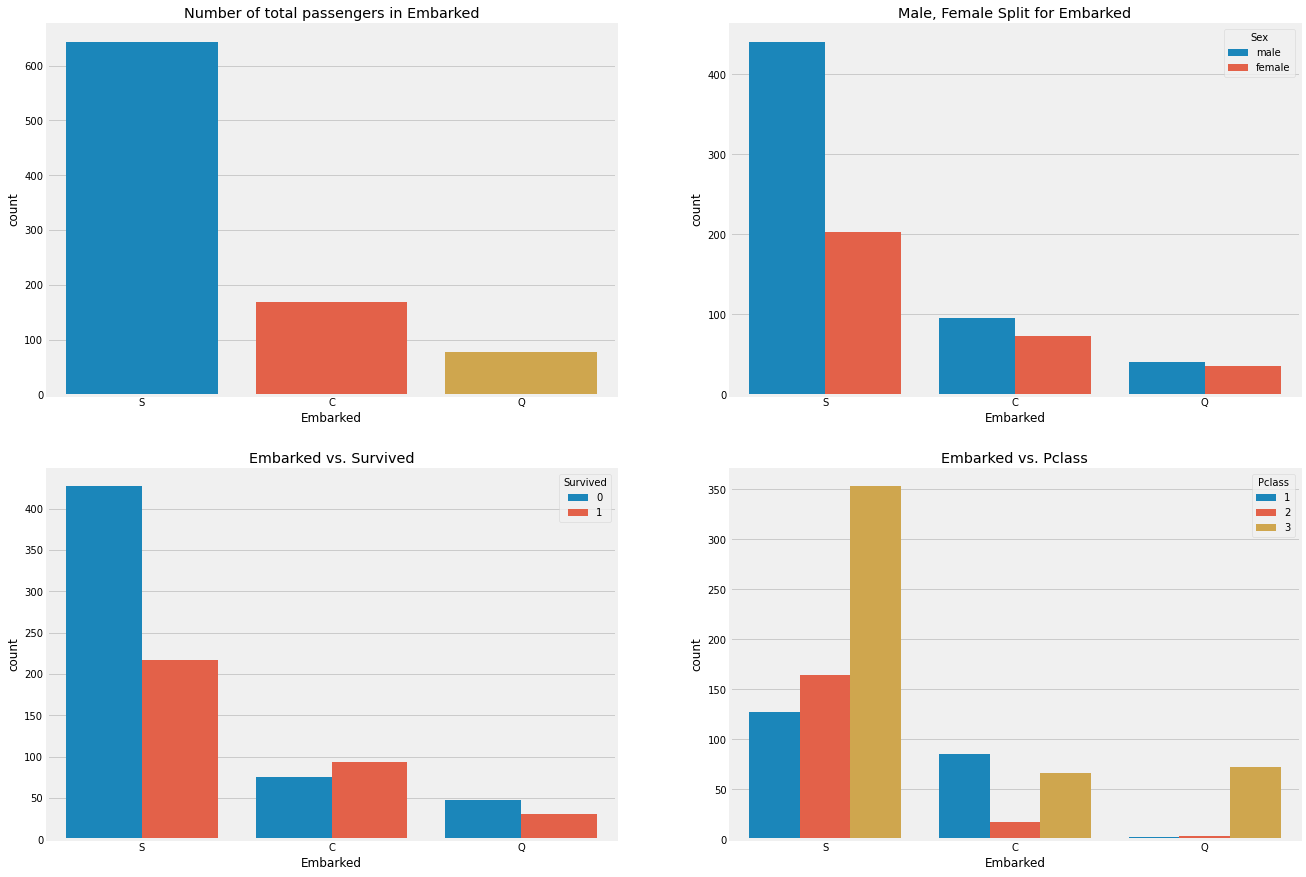

In [168]:
fig6,axs6 = plt.subplots(2,2,figsize=(20,15))
# data['Embarked'].value_counts().plot.bar(ax=axs6[0][0])
sns.countplot('Embarked',data=data,ax=axs6[0,0])
axs6[0,0].set_title("Number of total passengers in Embarked")

sns.countplot('Embarked',data=data,ax=axs6[0,1],hue='Sex')
axs6[0,1].set_title('Male, Female Split for Embarked')

sns.countplot('Embarked',data=data,ax=axs6[1,0],hue='Survived')
axs6[1,0].set_title('Embarked vs. Survived')

sns.countplot('Embarked',data=data,ax=axs6[1,1],hue='Pclass')
axs6[1,1].set_title('Embarked vs. Pclass')

plt.show()




Observations:\
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3

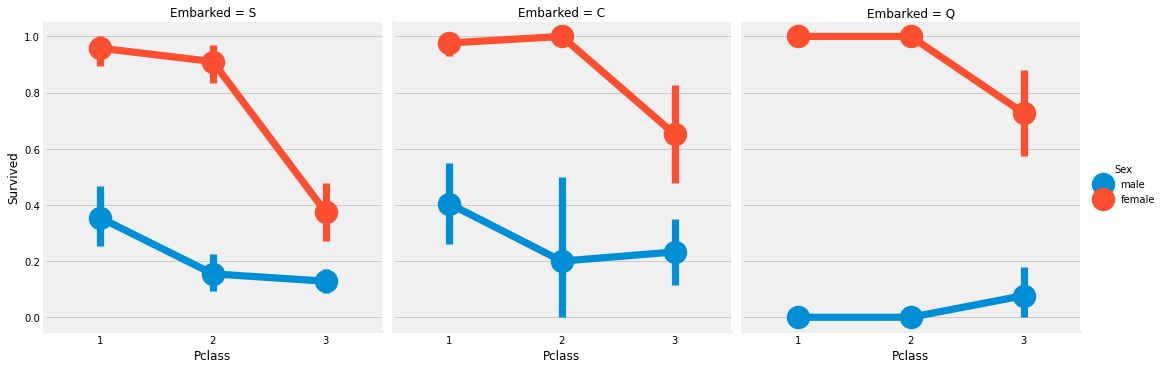

In [169]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

Observations:\
1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

__Filling Embarked \"Nan\"__

As most of passengers were from Embarked __S__. So we repalce Nan with **S** in Embarked Column

In [170]:
data['Embarked'].fillna(value='S', inplace=True)

In [171]:
data['Embarked'].isnull().any() #checking Null value

False

__SibSip &#8594; Discrete Feature__

This feature represents whether a person is alone or with his family members.

__Sibling__ = brother, sister, stepbrother, stepsister

__Spouse__ = husband, wife



In [172]:
pd.crosstab(data.SibSp,data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


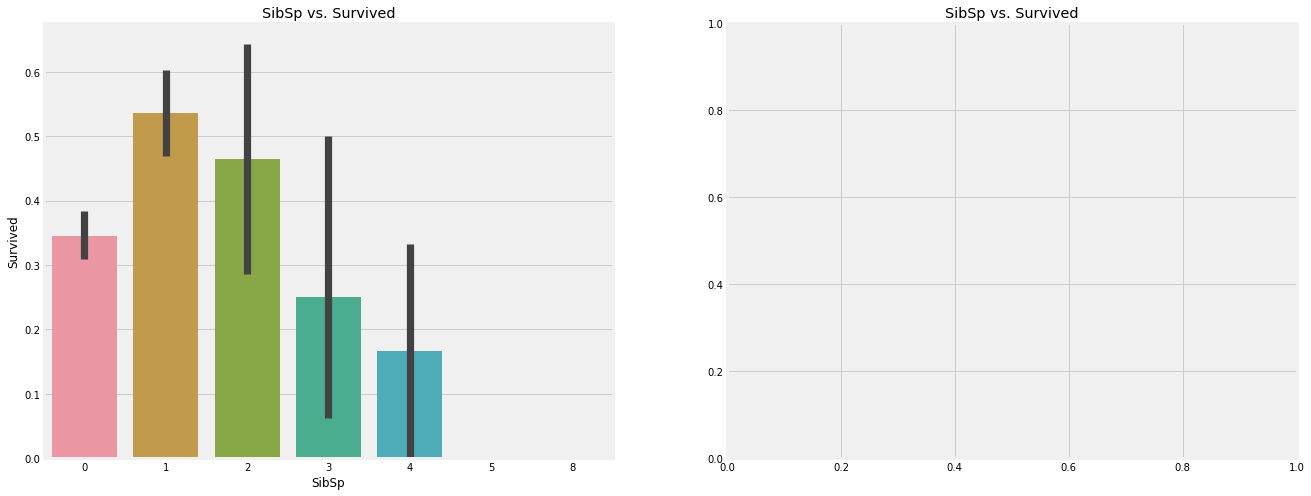

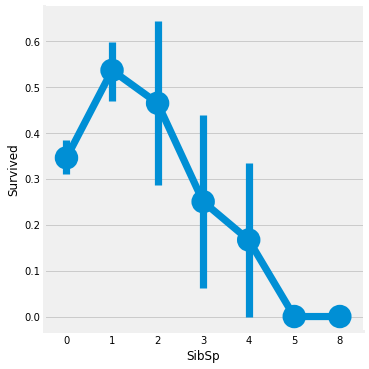

In [173]:
fig7,axs7 = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data,ax=axs7[0])
axs7[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp','Survived', data=data, ax=axs7[1])
axs7[1].set_title('SibSp vs. Survived')

plt.close(3)
plt.show()


Observations:
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

__Parch   (# of parents / children aboard the Titanic)__

In [174]:
pd.crosstab(index=data.Parch, columns=data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


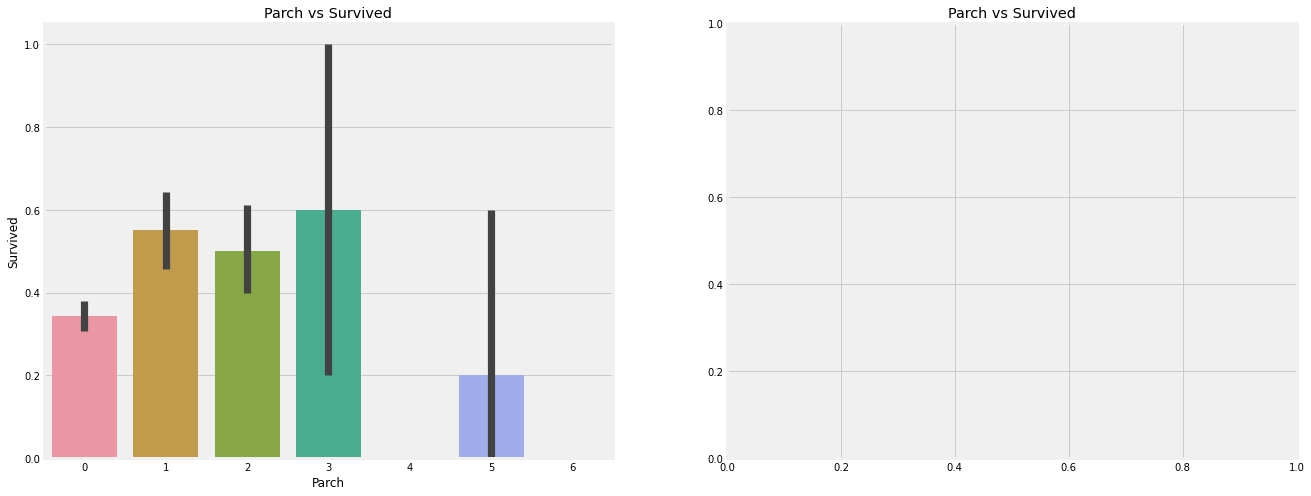

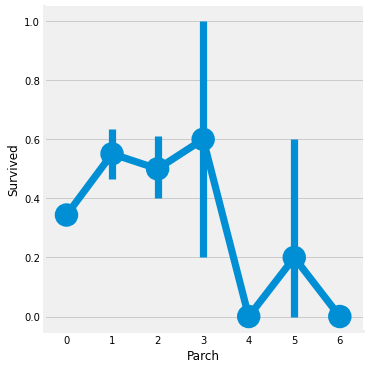

In [175]:
f,axs=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=axs[0])
axs[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=axs[1])
axs[1].set_title('Parch vs Survived')
plt.close(3)
plt.show()

__Observations:__
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

__Fare &#8594; Continous Variable__

In [176]:
print(f"Highest Fare {data['Fare'].max()}")
print(f"Lowest Fare {data['Fare'].min()}")
print(f"Average Fare {data['Fare'].mean()}")

Highest Fare 512.3292
Lowest Fare 0.0
Average Fare 32.2042079685746


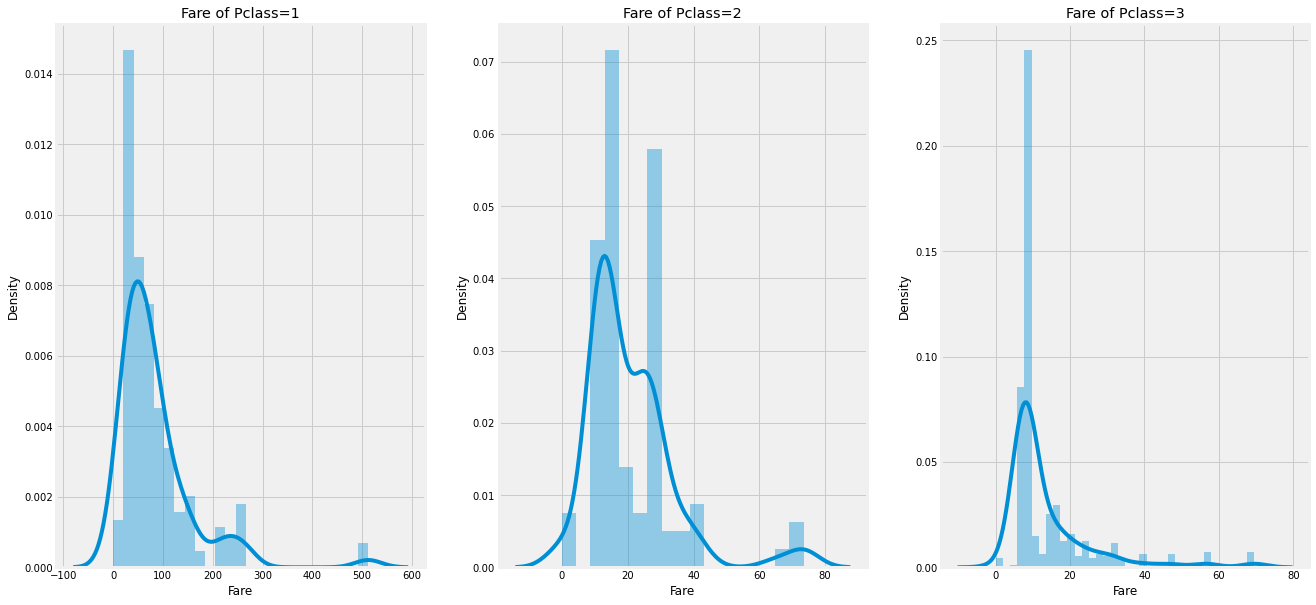

In [177]:
f,axs = plt.subplots(nrows=1,ncols=3, figsize=(20,10))
sns.distplot(data[data['Pclass']==1].Fare, ax=axs[0])
axs[0].set_title("Fare of Pclass=1")

sns.distplot(data[data['Pclass']==2].Fare, ax=axs[1])
axs[1].set_title("Fare of Pclass=2")

sns.distplot(data[data['Pclass']==3].Fare, ax=axs[2])
axs[2].set_title("Fare of Pclass=3")

plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.



__Observations in a Nutshell for all features:__


__Sex__: The chance of survival for women is high as compared to men.

__Pclass__:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

__Age__: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

__Embarked__: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

__Parch+SibSp__: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you

__Correlation Between The Features¶__


In [178]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


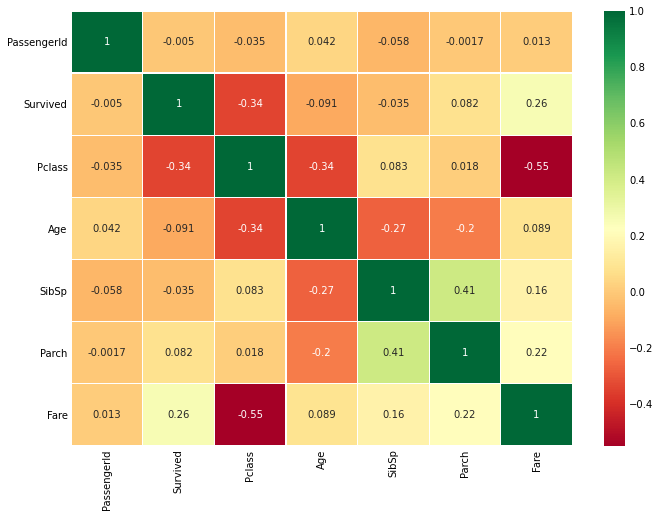

In [179]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

__Interpreting The Heatmap__
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

__POSITIVE CORRELATION:__ If an __increase in feature A leads to increase in feature B, then they are positively correlated.__ A value __1 means perfect positive correlation.__

__NEGATIVE CORRELATION:__ If an __increase in feature A leads to decrease in feature B, then they are negatively correlated.__ A value __-1 means perfect negative correlation.__

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as __MultiColinearity__ as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

__Part2: Feature Engineering and Data Cleaning__

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

__Age_band__


__Problem With Age Feature:__

As I have mentioned earlier that __Age is a continous feature,__ there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these __continous values into categorical values__ by either __Binning or Normalisation.__ I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [180]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [181]:
#checking the number of passenegers in each band
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


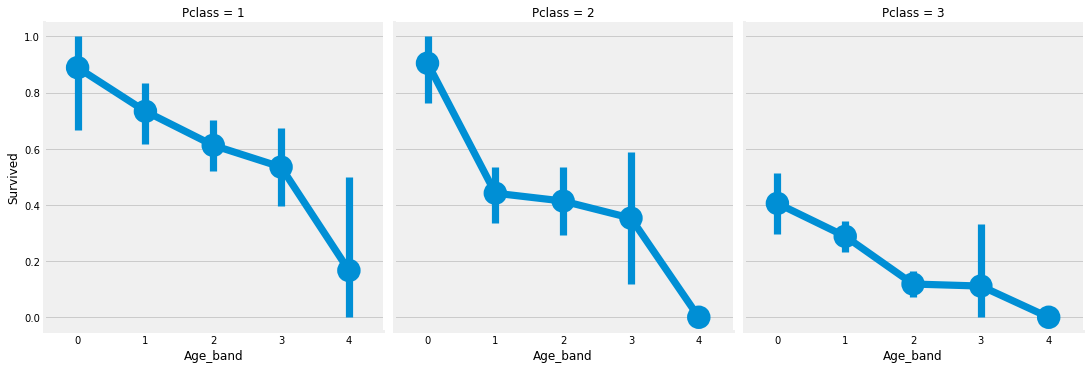

In [182]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

True that..the survival rate decreases as the age increases irrespective of the Pclass



Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [183]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0


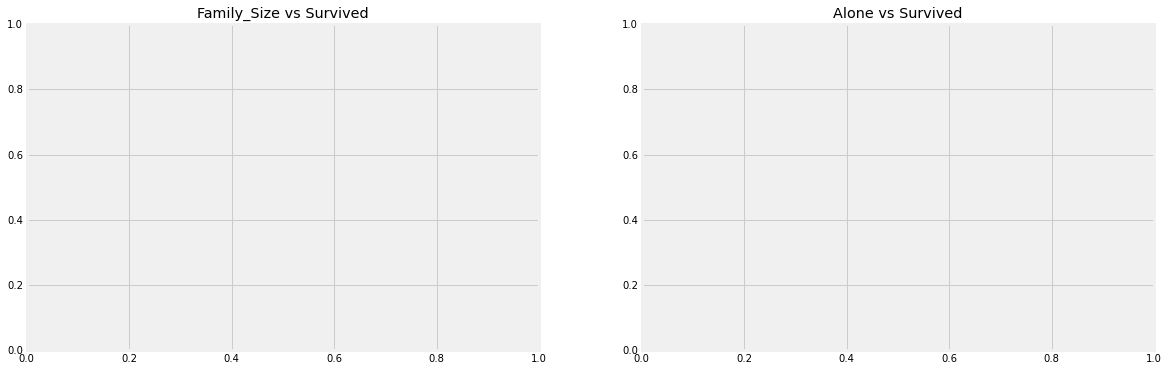

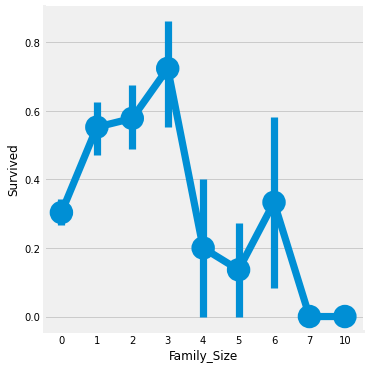

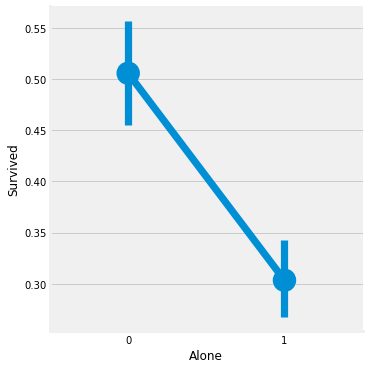

In [184]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

__Family_Size=0 means that the passeneger is alone.__ Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

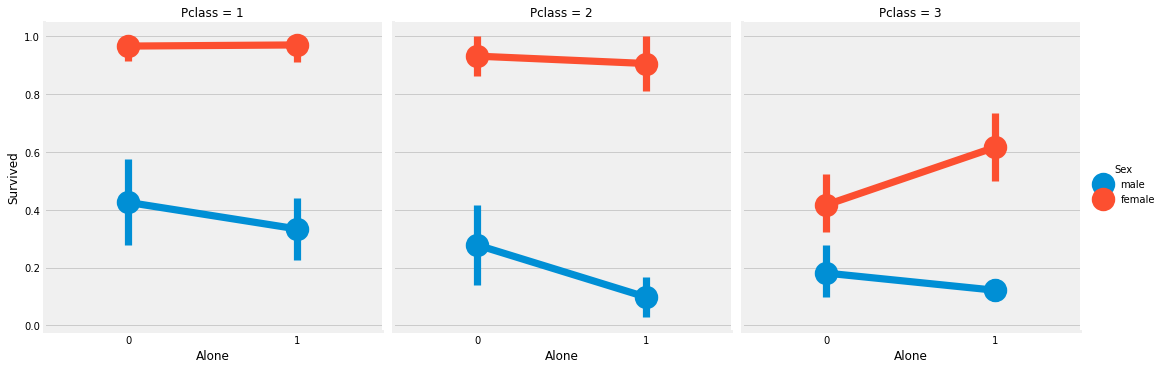

In [185]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

__Fare_Range__

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [186]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data['Fare_Range']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare_Range, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [187]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [188]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

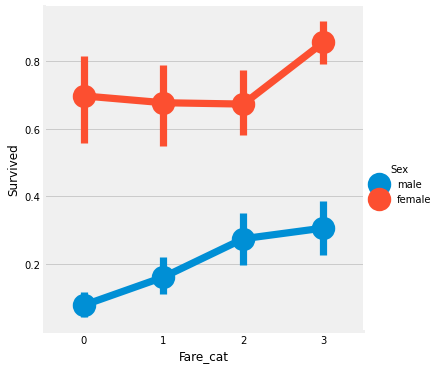

In [189]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases.

This feature may become an important feature during modeling along with the Sex.

__Converting String Values into Numeric__

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [190]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3


__Dropping UnNeeded Features__

__Name__--> We don't need name feature as it cannot be converted into any categorical value.

__Age__--> We have the Age_band feature, so no need of this.

__Ticket__--> It is any random string that cannot be categorised.

__Fare__--> We have the Fare_cat feature, so unneeded

__Cabin__--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

__Fare_Range__--> We have the fare_cat feature.

__PassengerId__--> Cannot be categorised.

In [191]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

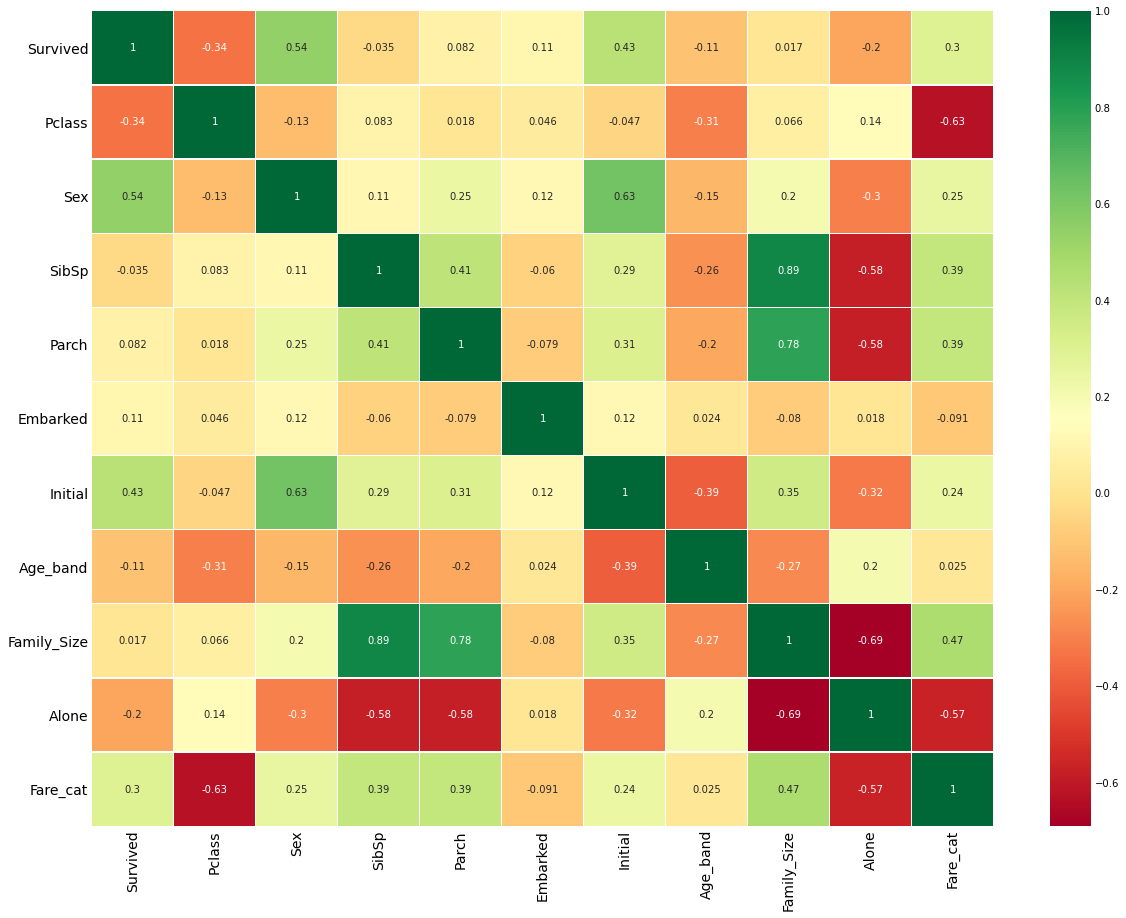

In [193]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. 

Some of them being SibSp andd Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.